## Objective of this program:
- To practise data importing and preprocessing skills by using the pandas library in
Python.
- To acquire a better understanding of supervised learning methods by using a public-domain
software package scikit-learn.
- To evaluate the performance of several supervised learning methods by conducting empir-
ical study on a real-world dataset.

# Part 1: Data Preprocessing
- remove the duplicates 
- fill in the missing values with the median value.
- visualize the correlation between every two of the 10 features with a heatmap.

In [1]:
# Import Library
import pandas as pd

# Load CSV files
d = pd.read_csv('./data/train.csv')
d.shape

(1620, 11)

In [2]:
# remove the duplicates
d.duplicated().sum()
no_dupes = d.drop_duplicates()
no_dupes.shape


(1617, 11)

In [3]:
## For debugging
# no_dupes.median()

## show all the row with NaN
# no_dupes[no_dupes.isna().any(axis=1)]

In [4]:
# fill in the missing values with the median value.
df = no_dupes.fillna(no_dupes.median())

# debugging: checking sepcific row
#df.iloc[330,:]

AxesSubplot(0.125,0.125;0.62x0.755)


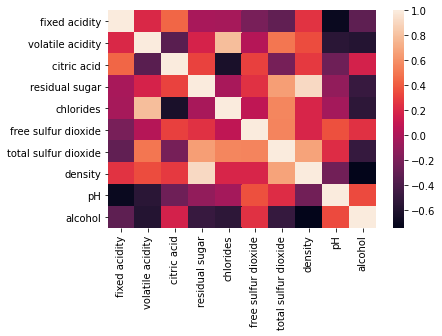

In [5]:
# heatmap for [Q1]

import seaborn as sns

df_corr = df.iloc[:10,:10].corr()
print(sns.heatmap(df_corr))

# Part 2: Linear Regression

In [6]:
#First step: Build six linear regression models in the first step
#Each model uses one feature to find whether it is correlated with the feature ‘density’. 
#The six features are ‘fixed acidity’, ‘residual sugar’, ‘chlorides’, ‘free sulfur dioxide’, ‘total sulfur dioxide’, and ‘alcohol’.

# This algotithm is able to calculate the R^2 score for [Q2] and 
# plot the required graph for [Q3]
# modify X_value to change variable in x-axis

# Import library
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split

## linear regression model for first step 

#split the dataset into x and y

df_y = df['density']

# change model here
# 0 for producing R2 score and linear regression for 1 feature
# 1 for producing R2 score for all 6 features
# change X_value for 1 feature

step = 1

if(step == 0 ):
    X_value = 'alcohol'
    df_X = df[X_value]
    df_X = df_X[:, np.newaxis]
    
else:
        df_X = df[['fixed acidity','residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','alcohol']]

#split the dataset into the training set and the testig set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size = 0.8, random_state = 4211) 

#create model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

## testing:
#df_X.shape

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
#print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

# R^2 score: 1 is perfect prediction
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

if(step == 0):
    # Plot outputs
    plt.title(' Desity vs ' + X_value + ' \n R^2 score: %.2f' % r2_score(y_test, y_pred) )
    plt.xlabel(X_value)
    plt.ylabel('Density')
    plt.scatter(X_test, y_test,  color='blue')
    plt.plot(X_test, y_pred, color='black', linewidth=3)
    plt.show()

R^2 score: 0.94


# Part 3 Logistic Regression

In [7]:
# 6.1 Select chi-squared statistics as the score for feature selection 
# and then drop the two least important features.from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler


X = df[['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH', 'alcohol']]
y1 = df['label']

score , pval = chi2(X, y1)
X_new = SelectKBest(chi2, k=8).fit_transform(X, y1)

## StandardScaler

s = StandardScaler()
temp = s.fit_transform(X_new)

## adding title, transform from np->dataframe
title = 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','pH', 'alcohol'

X1 = pd.DataFrame(temp ,columns=list(title))
X1

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol
0,1.400757,-0.226356,-0.937533,-0.556404,-1.348827,-1.715787,-1.308507,1.251955
1,1.969173,-0.579059,-0.368211,-0.477040,-1.000175,-0.663329,-0.330695,-0.604584
2,1.173391,-1.019937,-0.989290,-0.278631,-1.058284,-1.441233,-0.069945,0.283325
3,-0.304491,-1.196289,-0.927182,-0.119904,0.801196,0.114574,2.276805,1.574831
4,1.628124,1.096280,2.747534,-0.278631,0.394435,0.778081,-1.373695,-0.604584
...,...,...,...,...,...,...,...,...
1612,-0.759224,1.008104,-0.844371,-0.953222,-1.697480,-1.875944,-0.982570,2.059145
1613,-0.077125,-0.667234,-0.989290,0.197550,0.220109,-0.251498,-0.982570,-1.008180
1614,-0.418174,-0.579059,-0.968587,-0.596086,-0.302870,-0.594691,0.647118,-0.604584
1615,-0.304491,0.214523,0.418489,-0.000859,1.324175,0.686563,-0.265507,-0.685304


# 6.2 logistic regression model

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, metrics, model_selection
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
import time

# split the data set
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size=0.2, random_state=4211)

#Linear classifiers (SVM, logistic regression, etc.) with SGD training.
clf_sgd = SGDClassifier(loss='log', penalty='l2', max_iter= 135, random_state=4211, verbose=1) # loss='log' means Logistic Regression

## count time
s1 = time.time()

# model training
clf_sgd.fit(X2_train, y2_train)

e1 = time.time()

t1 = e1 - s1
print("\n training time")
print(t1)

# statistics for the SGD model(accuracy and F1 score)
y_hat = clf_sgd.predict(X2_test)
print('Logistic Regression with SGD:')
print('accuracy:', accuracy_score(y2_test, y_hat))
print('f1:', f1_score(y2_test, y_hat))

-- Epoch 1
Norm: 24.89, NNZs: 8, Bias: -7.504798, T: 1293, Avg. loss: 6.455288
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 19.91, NNZs: 8, Bias: -5.112554, T: 2586, Avg. loss: 3.293622
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 15.01, NNZs: 8, Bias: -5.516475, T: 3879, Avg. loss: 2.284221
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.15, NNZs: 8, Bias: -4.861454, T: 5172, Avg. loss: 1.760262
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.95, NNZs: 8, Bias: -2.571663, T: 6465, Avg. loss: 1.350020
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.19, NNZs: 8, Bias: -4.239196, T: 7758, Avg. loss: 1.207318
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 8.52, NNZs: 8, Bias: -3.382003, T: 9051, Avg. loss: 1.047122
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.49, NNZs: 8, Bias: -2.145445, T: 10344, Avg. loss: 0.922713
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 6.06, NNZs: 8, Bias: -3.596839, T: 11637, Avg. loss: 0.833623
Total traini

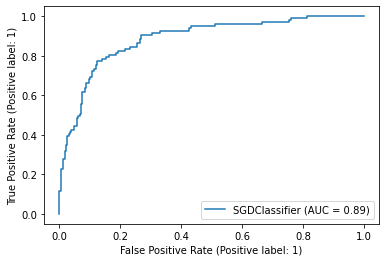

In [9]:
metrics.plot_roc_curve(clf_sgd, X2_test, y2_test)  
plt.show()     

# 6.2.1 Single-hidden-layer Neural Networks

In [10]:
from sklearn.neural_network import MLPClassifier
import time

clf2 = MLPClassifier(hidden_layer_sizes=(128, ), random_state=4211, solver='sgd', max_iter=500, verbose=True, early_stopping = True)

## count time
s2 = time.time()

# model training
clf2.fit(X2_train, y2_train)

e2 = time.time()

t2 = e2 - s2
print("\n training time")
print(t2)
y_hat2 = clf2.predict(X2_test)
print('accuracy:', accuracy_score(y2_test, y_hat2))
print('f1:', f1_score(y2_test, y_hat2))

Iteration 1, loss = 0.85021995
Validation score: 0.376923
Iteration 2, loss = 0.83019487
Validation score: 0.376923
Iteration 3, loss = 0.80286835
Validation score: 0.376923
Iteration 4, loss = 0.77398071
Validation score: 0.407692
Iteration 5, loss = 0.74536355
Validation score: 0.400000
Iteration 6, loss = 0.71895788
Validation score: 0.423077
Iteration 7, loss = 0.69546625
Validation score: 0.507692
Iteration 8, loss = 0.67460351
Validation score: 0.584615
Iteration 9, loss = 0.65579405
Validation score: 0.638462
Iteration 10, loss = 0.63879292
Validation score: 0.707692
Iteration 11, loss = 0.62394252
Validation score: 0.761538
Iteration 12, loss = 0.61063692
Validation score: 0.784615
Iteration 13, loss = 0.59882167
Validation score: 0.792308
Iteration 14, loss = 0.58765323
Validation score: 0.800000
Iteration 15, loss = 0.57802629
Validation score: 0.792308
Iteration 16, loss = 0.56896912
Validation score: 0.792308
Iteration 17, loss = 0.56064877
Validation score: 0.807692
Iterat

In [11]:
# [q7] graph
q7_data = pd.read_csv('./q7data.csv')
q7_data

,H,accuracy,f1
0,1,0.700617,0.000000
1,1,0.299383,0.460808
2,1,0.700617,0.000000
3,2,0.299383,0.460808
4,2,0.308642,0.453659
5,2,0.700617,0.000000
6,4,0.777778,0.604396
7,4,0.700617,0.000000
8,4,0.780864,0.564417
9,8,0.833333,0.727273


<function matplotlib.pyplot.show(close=None, block=None)>

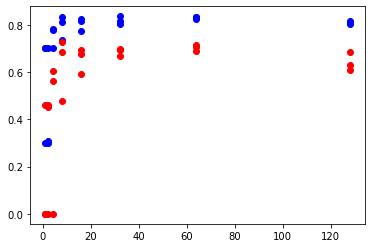

In [12]:
x_axis = q7_data['H']


y_axis1 = q7_data['accuracy']
y_axis2 = q7_data['f1']



plt.scatter(x_axis, y_axis1,  color='blue')
plt.scatter(x_axis, y_axis2,  color='red')

plt.show

# 7.1  Hyperameter tuning


In [13]:
# split data
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1, test_size=0.2, random_state=4211)

In [ ]:
#[Q10]

import numpy as np
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import RandomizedSearchCV

random_dist = {
    'hidden_layer_sizes': [(20, ), (10, 10), (15, 5)],
    'learning_rate': ['constant', 'invscaling'],
    'learning_rate_init': loguniform(1e-3, 1e0),
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

#mlp = MLPClassifier()
mlp = MLPClassifier(random_state=4211,max_iter=20, early_stopping=True)

random_search = RandomizedSearchCV(mlp, random_dist, n_iter=20, cv=5, verbose=3)

random_search.fit(X3_train, y3_train)

In [15]:
# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [16]:
# [Q11, 12]
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.858 (std: 0.019)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.15983486837133745, 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.857 (std: 0.029)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (15, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.19257080107352822, 'solver': 'sgd'}

Model with rank: 3
Mean validation score: 0.857 (std: 0.024)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0516736179877827, 'solver': 'adam'}

Model with rank: 4
Mean validation score: 0.844 (std: 0.026)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (15, 5), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0919917613958254, 'solver': 'adam'}

Model with rank: 5
Mean validation score: 0.844 (std: 0.014)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (20,), 'lea

In [17]:
#[Q13]

random_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (10, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.15983486837133745,
 'solver': 'sgd'}

In [18]:
#[Q13]
m = MLPClassifier(activation = 'relu',learning_rate_init =  0.12701745732326278, learning_rate = 'constant',hidden_layer_sizes=(20, ), random_state=4211, solver='adam', max_iter=20, verbose=True, early_stopping = True)


# model training
m.fit(X3_train, y3_train)

y_hat3 = m.predict(X3_test)
print('accuracy:', accuracy_score(y3_test, y_hat3))
print('f1:', f1_score(y3_test, y_hat3))

Iteration 1, loss = 0.50017553
Validation score: 0.823077
Iteration 2, loss = 0.36226743
Validation score: 0.792308
Iteration 3, loss = 0.34679697
Validation score: 0.861538
Iteration 4, loss = 0.32887035
Validation score: 0.853846
Iteration 5, loss = 0.33035949
Validation score: 0.861538
Iteration 6, loss = 0.31158453
Validation score: 0.861538
Iteration 7, loss = 0.31368140
Validation score: 0.876923
Iteration 8, loss = 0.31024338
Validation score: 0.892308
Iteration 9, loss = 0.29709791
Validation score: 0.838462
Iteration 10, loss = 0.29585415
Validation score: 0.869231
Iteration 11, loss = 0.30025760
Validation score: 0.876923
Iteration 12, loss = 0.29616474
Validation score: 0.853846
Iteration 13, loss = 0.29501644
Validation score: 0.876923
Iteration 14, loss = 0.28665867
Validation score: 0.846154
Iteration 15, loss = 0.28704236
Validation score: 0.869231
Iteration 16, loss = 0.27589730
Validation score: 0.830769
Iteration 17, loss = 0.29068339
Validation score: 0.838462
Iterat

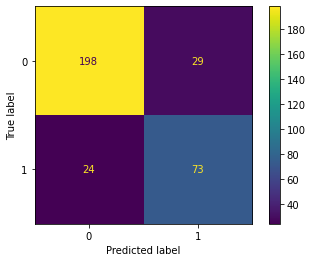

In [19]:
# confusion-matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_search, X3_test, y3_test)

# Part 7.2

In [20]:
#[Q15]

tt = pd.read_csv('./data/test.csv')
tX= tt[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','pH', 'alcohol']]
ty = tt['label']


final = StandardScaler().fit_transform(tX)
title = 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','pH', 'alcohol'

tData = pd.DataFrame(final ,columns=list(title))
tData
tData

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol
0,-0.054093,1.478874,-0.153667,-0.612983,-0.377387,0.341570,-0.624317,1.505702
1,-0.431489,-0.185808,0.848851,0.829330,1.506335,0.880846,-0.340617,-1.150443
2,0.952295,2.164331,1.726055,-0.570562,0.136356,0.341570,-0.411542,1.036971
3,1.078093,-1.458800,-0.926442,-0.782667,-1.404871,-1.725657,1.077882,-0.291102
4,-1.060481,2.507060,-0.258096,0.235436,-1.005294,-0.332526,0.297707,-1.072321
...,...,...,...,...,...,...,...,...
395,0.323302,0.499649,2.018456,0.320278,0.650098,1.285304,-0.553392,-1.306687
396,-1.186280,-0.969188,1.475425,-0.400878,-0.320304,-0.197707,0.794182,1.036971
397,0.574899,-0.185808,-0.947328,-0.612983,-0.320304,0.026992,-0.198767,0.177630
398,1.078093,-0.283730,-0.822013,-0.825088,-0.491551,0.611208,-1.475416,1.271337


In [21]:
m = MLPClassifier(activation = 'relu',learning_rate_init =  0.12701745732326278, learning_rate = 'constant',hidden_layer_sizes=(20, ), random_state=4211, solver='adam', max_iter=20, verbose=True, early_stopping = True)


# model training
m.fit(X3_train, y3_train)

y_hat4 = m.predict(tData)
print('accuracy:', accuracy_score(ty, y_hat4))
print('f1:', f1_score(ty, y_hat4))

Iteration 1, loss = 0.50017553
Validation score: 0.823077
Iteration 2, loss = 0.36226743
Validation score: 0.792308
Iteration 3, loss = 0.34679697
Validation score: 0.861538
Iteration 4, loss = 0.32887035
Validation score: 0.853846
Iteration 5, loss = 0.33035949
Validation score: 0.861538
Iteration 6, loss = 0.31158453
Validation score: 0.861538
Iteration 7, loss = 0.31368140
Validation score: 0.876923
Iteration 8, loss = 0.31024338
Validation score: 0.892308
Iteration 9, loss = 0.29709791
Validation score: 0.838462
Iteration 10, loss = 0.29585415
Validation score: 0.869231
Iteration 11, loss = 0.30025760
Validation score: 0.876923
Iteration 12, loss = 0.29616474
Validation score: 0.853846
Iteration 13, loss = 0.29501644
Validation score: 0.876923
Iteration 14, loss = 0.28665867
Validation score: 0.846154
Iteration 15, loss = 0.28704236
Validation score: 0.869231
Iteration 16, loss = 0.27589730
Validation score: 0.830769
Iteration 17, loss = 0.29068339
Validation score: 0.838462
Iterat

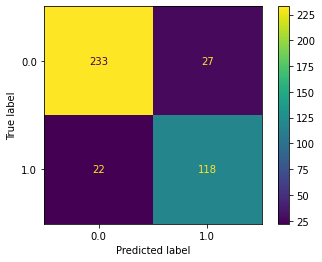

In [22]:
# confusion-matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_search, tData, ty)